In [48]:
import numpy as np
import unsiotools.unsiotools.simulations.cfalcon as falcon
import h5py
from bar_funcs import *
import matplotlib.pyplot as plt
import numpy as np

In [57]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

In [38]:
def find_peak_2(x, y, z, m):
    #build pos array
    pos = np.array( [x, y, z] )
    #format required by UNS
    pos = pos.T.astype('float32').flatten()
    #use falcon to get densities
    cf  = falcon.CFalcon()
    _, dens, _ = cf.getDensity(pos, m)
    
    # call function to compute densities
    dens = compute_density(x, y, z, m)
    #sort particles by decreasing density
    sort = np.argsort(dens)[::-1]
    x = x[sort]
    y = y[sort]
    z = z[sort]
    dens = dens[sort]
    #select a few of the densest particles
    Ndensest = 64
    #average positions of the densest particles
    xpeak = np.average(x[0:Ndensest])
    ypeak = np.average(y[0:Ndensest])
    zpeak = np.average(z[0:Ndensest])
    
    return xpeak, ypeak, zpeak

In [30]:
#caminhos galáxia + satélite
path_01_10 = 'satelites/sat01-10/'
path_01_20 = 'satelites/sat01-20/'
path_01_30 = 'satelites/sat01-30/'
path_05_10 = 'satelites/sat05-10/'
path_05_20 = 'satelites/sat05-20/'
path_05_30 = 'satelites/sat05-30/'
path_1_10 = 'satelites/sat1-10/'
path_1_20 = 'satelites/sat1-20/'
path_1_30 = 'satelites/sat1-30/'

paths = [path_01_10, path_01_20, path_01_30, path_05_10, path_05_20, path_05_30, path_1_10, path_1_20, path_1_30]

In [32]:
n_snapshots = 120

In [33]:
x_01_10 = np.empty(n_snapshots)
y_01_10 = np.empty(n_snapshots)
z_01_10 = np.empty(n_snapshots)

x_01_20 = np.empty(n_snapshots)
y_01_20 = np.empty(n_snapshots)
z_01_20 = np.empty(n_snapshots)

x_01_30 = np.empty(n_snapshots)
y_01_30 = np.empty(n_snapshots)
z_01_30 = np.empty(n_snapshots)

x_05_10 = np.empty(n_snapshots)
y_05_10 = np.empty(n_snapshots)
z_05_10 = np.empty(n_snapshots)

x_05_20 = np.empty(n_snapshots)
y_05_20 = np.empty(n_snapshots)
z_05_20 = np.empty(n_snapshots)

x_05_30 = np.empty(n_snapshots)
y_05_30 = np.empty(n_snapshots)
z_05_30 = np.empty(n_snapshots)

x_1_10 = np.empty(n_snapshots)
y_1_10 = np.empty(n_snapshots)
z_1_10 = np.empty(n_snapshots)

x_1_20 = np.empty(n_snapshots)
y_1_20 = np.empty(n_snapshots)
z_1_20 = np.empty(n_snapshots)

x_1_30 = np.empty(n_snapshots)
y_1_30 = np.empty(n_snapshots)
z_1_30 = np.empty(n_snapshots)

In [41]:
for p, path in enumerate(paths):
    snapshot = path + 'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        
    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info satélite
        f_bndry = f['PartType5']

        x_bndry = np.array(f_bndry['Coordinates'][:,0])
        y_bndry = np.array(f_bndry['Coordinates'][:,1])
        z_bndry = np.array(f_bndry['Coordinates'][:,2])
        m_bndry = np.array(f_bndry['Masses'])

        if p == 0:
            x_01_10[j], y_01_10[j], z_01_10[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 1:
            x_01_20[j], y_01_20[j], z_01_20[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 2:
            x_01_30[j], y_01_30[j], z_01_30[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 3:
            x_05_10[j], y_05_10[j], z_05_10[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 4:
            x_05_20[j], y_05_20[j], z_05_20[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 5:
            x_05_30[j], y_05_30[j], z_05_30[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 6:
            x_1_10[j], y_1_10[j], z_1_10[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 7:
            x_1_20[j], y_1_20[j], z_1_20[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 8:
            x_1_30[j], y_1_30[j], z_1_30[j] = find_peak_2(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)

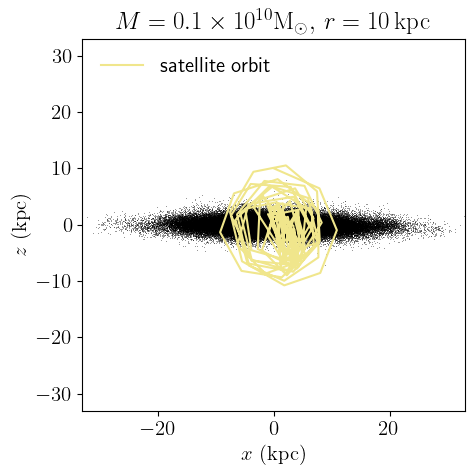

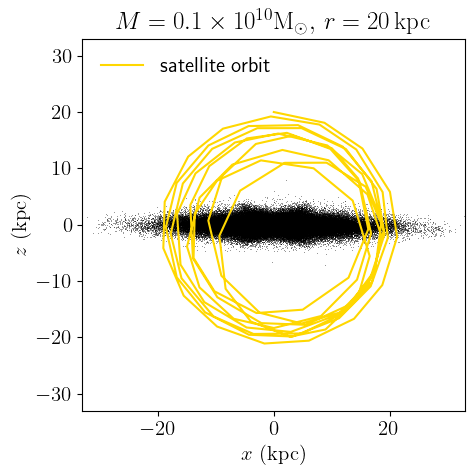

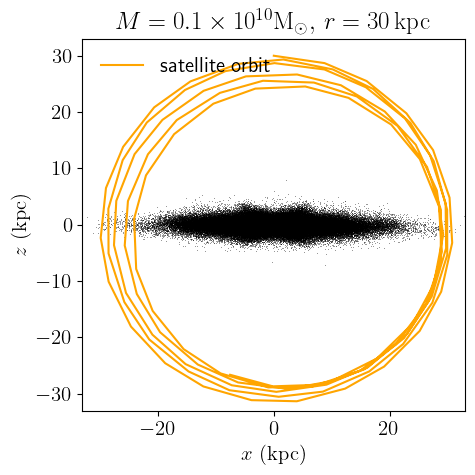

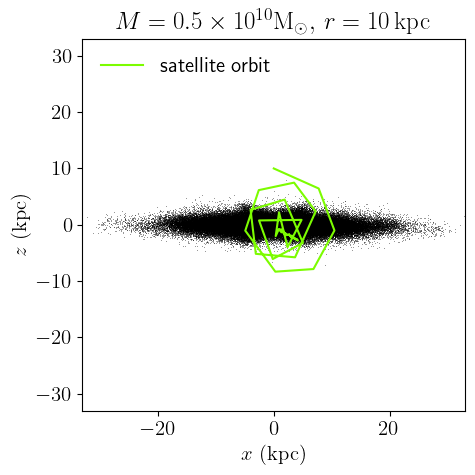

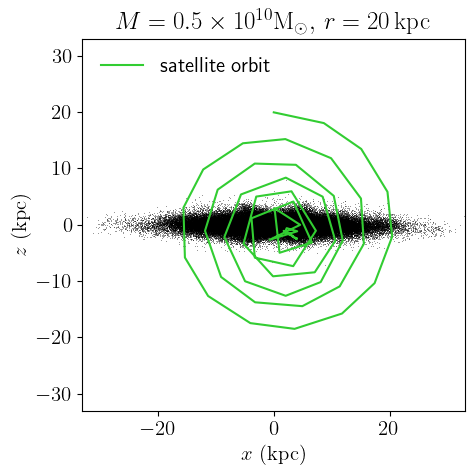

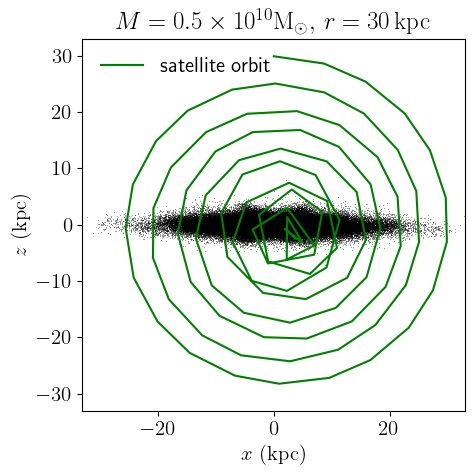

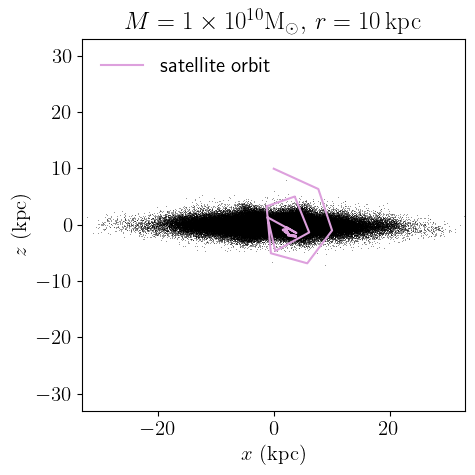

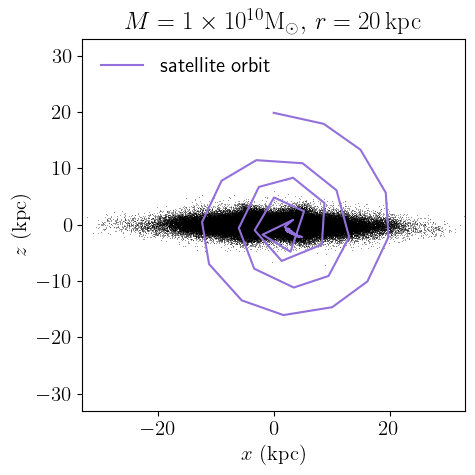

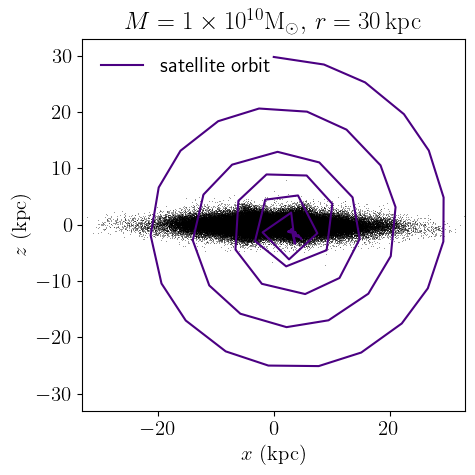

In [63]:
for i in range (0, 9):
    if i == 0:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_01_10, z_01_10, color='khaki', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-01-10.png')
        
    if i == 1:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_01_20, z_01_20, color='gold', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-01-20.png')
    
    if i == 2:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_01_30, z_01_30, color='orange', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-01-30.png')
        
    if i == 3:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_05_10, z_05_10, color='lawngreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-05-10.png')
        
    if i == 4:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_05_20, z_05_20, color='limegreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-05-20.png')
    
    if i == 5:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_05_30, z_05_30, color='green', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-05-30.png')
    
    if i == 6: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_1_10, z_1_10, color='plum', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-1-10.png')
        
    if i == 7: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_1_20, z_1_20, color='mediumpurple', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-1-20.png')
        
    if i == 8: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_1_30, z_1_30, color='indigo', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-1-30.png')

In [45]:
#arrays tempo
time_01_10 = np.empty(n_snapshots)
time_01_20 = np.empty(n_snapshots)
time_01_30 = np.empty(n_snapshots)

time_05_10 = np.empty(n_snapshots)
time_05_20 = np.empty(n_snapshots)
time_05_30 = np.empty(n_snapshots)

time_1_10 = np.empty(n_snapshots)
time_1_20 = np.empty(n_snapshots)
time_1_30 = np.empty(n_snapshots)

In [46]:
#tempo
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            time_01_10[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 1:
            time_01_20[j] = round(f['Header'].attrs['Time'], 2)    
        
        if p == 2:
            time_01_30[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 3:
            time_05_10[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 4:
            time_05_20[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 5:
            time_05_30[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 6:
            time_1_10[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 7:
            time_1_20[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 8:
            time_1_30[j] = round(f['Header'].attrs['Time'], 2)

In [54]:
time_01_10 = 8.0 + time_01_10
time_01_20 = 8.0 + time_01_20
time_01_30 = 8.0 + time_01_30
time_05_10 = 8.0 + time_05_10
time_05_20 = 8.0 + time_05_20
time_05_30 = 8.0 + time_05_30
time_1_10 = 8.0 + time_1_10
time_1_20 = 8.0 + time_1_20
time_1_30 = 8.0 + time_1_30

In [51]:
#arrays raios
r_01_10 = np.empty(n_snapshots)
r_01_20 = np.empty(n_snapshots)
r_01_30 = np.empty(n_snapshots)

r_05_10 = np.empty(n_snapshots)
r_05_20 = np.empty(n_snapshots)
r_05_30 = np.empty(n_snapshots)

r_1_10 = np.empty(n_snapshots)
r_1_20 = np.empty(n_snapshots)
r_1_30 = np.empty(n_snapshots)

In [52]:
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            r_01_10[j] = np.sqrt(x_01_10[j]**2+y_01_10[j]**2+z_01_10[j]**2)
            
        if p == 1:
            r_01_20[j] = np.sqrt(x_01_20[j]**2+y_01_20[j]**2+z_01_20[j]**2)   
        
        if p == 2:
            r_01_30[j] = np.sqrt(x_01_30[j]**2+y_01_30[j]**2+z_01_30[j]**2)
            
        if p == 3:
            r_05_10[j] = np.sqrt(x_05_10[j]**2+y_05_10[j]**2+z_05_10[j]**2)
            
        if p == 4:
            r_05_20[j] = np.sqrt(x_05_20[j]**2+y_05_20[j]**2+z_05_20[j]**2)
            
        if p == 5:
            r_05_30[j] = np.sqrt(x_05_30[j]**2+y_05_30[j]**2+z_05_30[j]**2)
            
        if p == 6:
            r_1_10[j] = np.sqrt(x_1_10[j]**2+y_1_10[j]**2+z_1_10[j]**2)
            
        if p == 7:
            r_1_20[j] = np.sqrt(x_1_20[j]**2+y_1_20[j]**2+z_1_20[j]**2)
            
        if p == 8:
            r_1_30[j] = np.sqrt(x_1_30[j]**2+y_1_30[j]**2+z_1_30[j]**2)

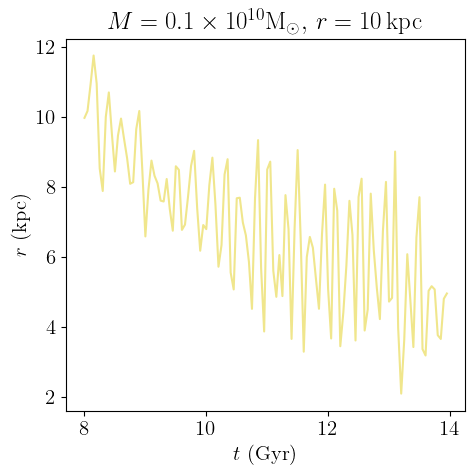

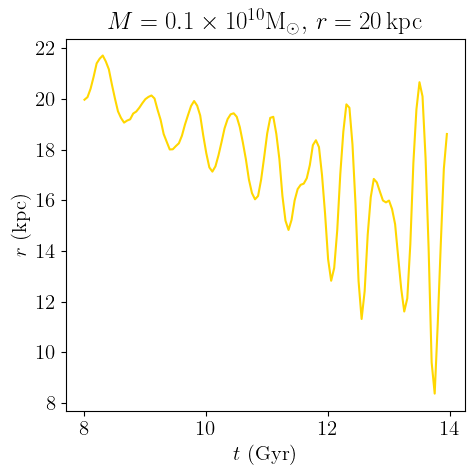

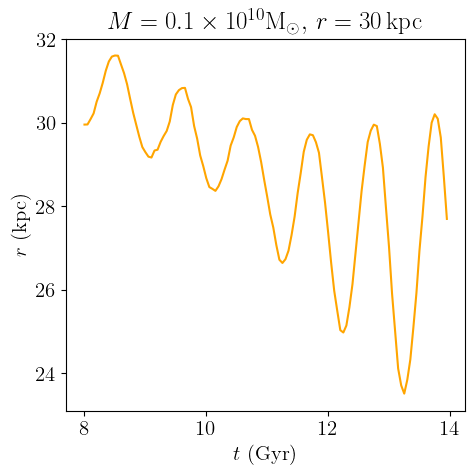

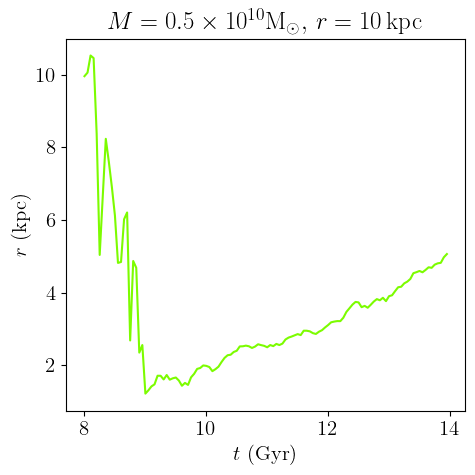

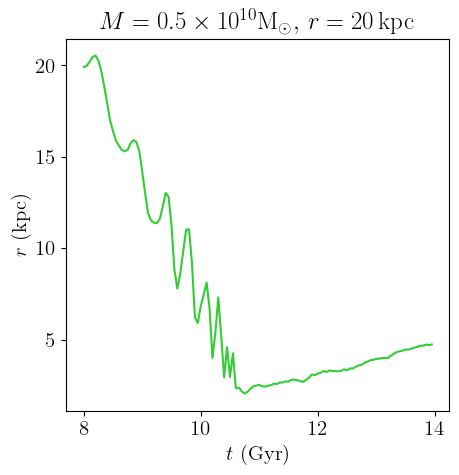

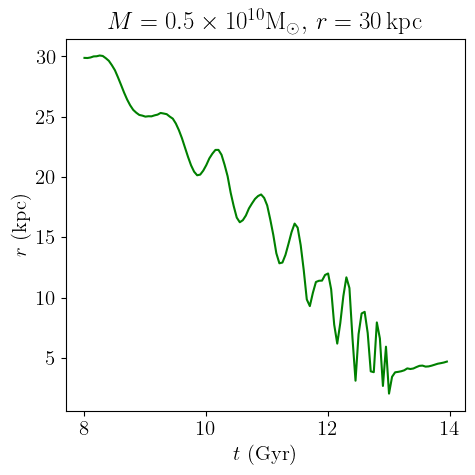

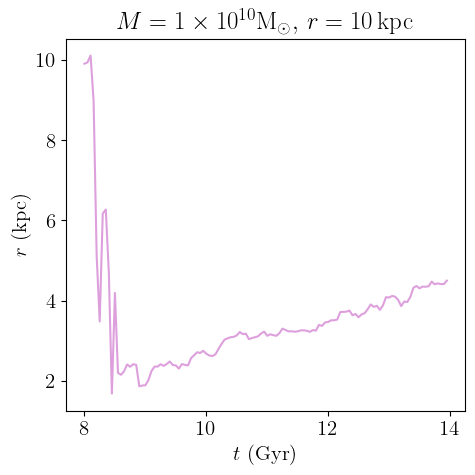

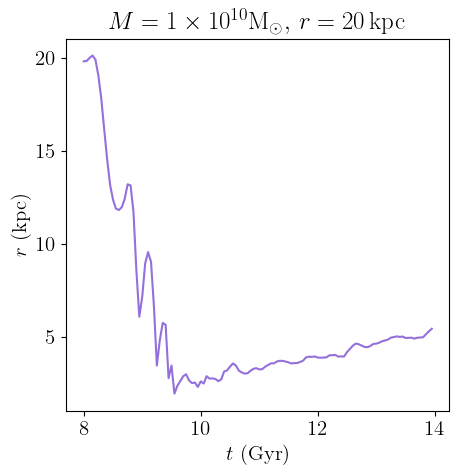

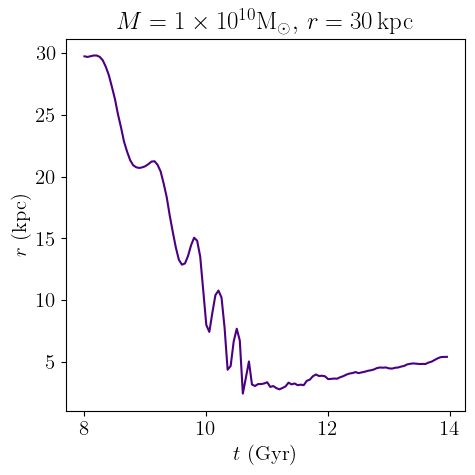

In [64]:
for i in range (0, 9):
    if i == 0:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_01_10, r_01_10, color='khaki')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-01-10.png')
        
    if i == 1:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_01_20, r_01_20, color='gold')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-01-20.png')
    
    if i == 2:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_01_30, r_01_30, color='orange')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-01-30.png')
        
    if i == 3:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_05_10, r_05_10, color='lawngreen')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        # plt.legend(loc='upper left', frameon=False)
        # plt.ylim(-33, 33)
        # plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-05-10.png')
        
    if i == 4:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_05_20, r_05_20, color='limegreen')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-05-20.png')
    
    if i == 5:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_05_30, r_05_30, color='green')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-05-30.png')
    
    if i == 6: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_1_10, r_1_10, color='plum')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-1-10.png')
        
    if i == 7: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_1_20, r_1_20, color='mediumpurple')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-1-20.png')
        
    if i == 8: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_1_30, r_1_30, color='indigo')
        plt.ylabel(r'$r~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-1-30.png')

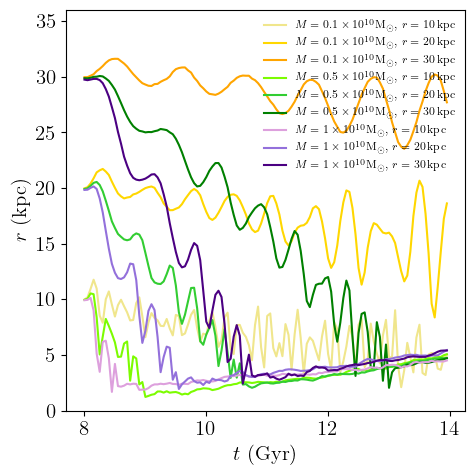

In [62]:
plt.figure(figsize=[5,5])#, dpi=200)
plt.plot(time_01_10, r_01_10, color='khaki',
        label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_01_20, r_01_20, color='gold',
        label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_01_30, r_01_30, color='orange',
        label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
plt.plot(time_05_10, r_05_10, color='lawngreen',
        label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_05_20, r_05_20, color='limegreen',
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_05_30, r_05_30, color='green',
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
plt.plot(time_1_10, r_1_10, color='plum',
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, r_1_20, color='mediumpurple',
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, r_1_30, color='indigo',
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
plt.ylabel(r'$r~({\rm kpc})$')
plt.xlabel(r'$t~({\rm Gyr})$')
plt.legend(loc='upper right', frameon=False, fontsize=8)
plt.ylim(0, 36)
plt.tight_layout()
plt.savefig('r.png')